## DATASET

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist, fashion_mnist
import matplotlib.pyplot as plt

In [ ]:
def datagenerator(x1,x2,batchsize):
    n1 = x1.shape[0]
    n2 = x2.shape[0]
    while True:
        num1 = np.random.randint(0, n1, batchsize)
        num2 = np.random.randint(0, n2, batchsize)

        x_data = (x1[num1] + x2[num2]) / 2.0
        y_data = np.concatenate((x1[num1], x2[num2]), axis=2)

        yield x_data, y_data 

In [ ]:
(mnist_x_train, mnist_y_train), (mnist_x_test, mnist_y_test) = mnist.load_data()
print(np.shape(mnist_x_train))
(fashion_mnist_x_train, fashion_mnist_y_train), (fashion_mnist_x_test, fashion_mnist_y_test) = fashion_mnist.load_data()
#normnalize in and pad
mnist_x_train = np.pad(mnist_x_train,((0,0),(2,2),(2,2)))/255.
print(np.shape(mnist_x_train))
mnist_x_test = np.pad(mnist_x_test,((0,0),(2,2),(2,2)))/255.
fashion_mnist_x_train = np.pad(fashion_mnist_x_train,((0,0),(2,2),(2,2)))/255.
fashion_mnist_x_test = np.pad(fashion_mnist_x_test,((0,0),(2,2),(2,2)))/255.

(60000, 28, 28)
(60000, 32, 32)


In [ ]:
mnist_x_train.shape

(60000, 32, 32)

In [ ]:
mnist_x_test.shape

(10000, 32, 32)

In [ ]:
fashion_mnist_x_train.shape

(60000, 32, 32)

In [ ]:
fashion_mnist_x_test.shape

(10000, 32, 32)

In [ ]:
N_train, w, h = mnist_x_train.shape[0], mnist_x_train.shape[1], mnist_x_train.shape[2]
N_test = mnist_x_test.shape[0]

In [ ]:
batchsize = 64

In [ ]:
train_generator = datagenerator(mnist_x_train, fashion_mnist_x_train, batchsize)
test_generator = datagenerator(mnist_x_test, fashion_mnist_x_test, batchsize)

In [ ]:
x_batch, y_batch = next(train_generator)

In [ ]:
x_batch.shape

(64, 32, 32)

In [ ]:
y_batch.shape

(64, 32, 64)

In [ ]:
x_batch[0].min(), x_batch[0].max()

(0.0, 0.7705882352941176)

In [ ]:
y_batch[0].min(), y_batch[0].max()

(0.0, 1.0)

In [ ]:
input_shape = (32,32,1)

## MODEL
https://github.com/MrGiovanni/UNetPlusPlus

In [ ]:
# MODELS WEIGTHS

weights_collection = [

    # ResNet18
    {
        'model': 'resnet18',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet18_imagenet_1000.h5',
        'name': 'resnet18_imagenet_1000.h5',
        'md5': '64da73012bb70e16c901316c201d9803',
    },

    {
        'model': 'resnet18',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet18_imagenet_1000_no_top.h5',
        'name': 'resnet18_imagenet_1000.h5',
        'md5': '318e3ac0cd98d51e917526c9f62f0b50',
    },

    # ResNet34
    {
        'model': 'resnet34',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet34_imagenet_1000.h5',
        'name': 'resnet34_imagenet_1000.h5',
        'md5': '2ac8277412f65e5d047f255bcbd10383',
    },

    {
        'model': 'resnet34',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet34_imagenet_1000_no_top.h5',
        'name': 'resnet34_imagenet_1000_no_top.h5',
        'md5': '8caaa0ad39d927cb8ba5385bf945d582',
    },

    # ResNet50
    {
        'model': 'resnet50',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet50_imagenet_1000.h5',
        'name': 'resnet50_imagenet_1000.h5',
        'md5': 'd0feba4fc650e68ac8c19166ee1ba87f',
    },

    {
        'model': 'resnet50',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet50_imagenet_1000_no_top.h5',
        'name': 'resnet50_imagenet_1000_no_top.h5',
        'md5': 'db3b217156506944570ac220086f09b6',
    },

    {
        'model': 'resnet50',
        'dataset': 'imagenet11k-places365ch',
        'classes': 11586,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet50_places365_11586.h5',
        'name': 'resnet50_places365_11586.h5',
        'md5': 'bb8963db145bc9906452b3d9c9917275',
    },

    {
        'model': 'resnet50',
        'dataset': 'imagenet11k-places365ch',
        'classes': 11586,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet50_imagenet_11586_no_top.h5',
        'name': 'resnet50_imagenet_11586_no_top.h5',
        'md5': 'd8bf4e7ea082d9d43e37644da217324a',
    },

    # ResNet101
    {
        'model': 'resnet101',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet101_imagenet_1000.h5',
        'name': 'resnet101_imagenet_1000.h5',
        'md5': '9489ed2d5d0037538134c880167622ad',
    },

    {
        'model': 'resnet101',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet101_imagenet_1000_no_top.h5',
        'name': 'resnet101_imagenet_1000_no_top.h5',
        'md5': '1016e7663980d5597a4e224d915c342d',
    },


    # ResNet152
    {
        'model': 'resnet152',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet152_imagenet_1000.h5',
        'name': 'resnet152_imagenet_1000.h5',
        'md5': '1efffbcc0708fb0d46a9d096ae14f905',
    },

    {
        'model': 'resnet152',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet152_imagenet_1000_no_top.h5',
        'name': 'resnet152_imagenet_1000_no_top.h5',
        'md5': '5867b94098df4640918941115db93734',
    },

    {
        'model': 'resnet152',
        'dataset': 'imagenet11k',
        'classes': 11221,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet152_imagenet11k_11221.h5',
        'name': 'resnet152_imagenet11k_11221.h5',
        'md5': '24791790f6ef32f274430ce4a2ffee5d',
    },

    {
        'model': 'resnet152',
        'dataset': 'imagenet11k',
        'classes': 11221,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnet152_imagenet11k_11221_no_top.h5',
        'name': 'resnet152_imagenet11k_11221_no_top.h5',
        'md5': '25ab66dec217cb774a27d0f3659cafb3',
    },


    # ResNeXt50
    {
        'model': 'resnext50',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnext50_imagenet_1000.h5',
        'name': 'resnext50_imagenet_1000.h5',
        'md5': '7c5c40381efb044a8dea5287ab2c83db',
    },

    {
        'model': 'resnext50',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnext50_imagenet_1000_no_top.h5',
        'name': 'resnext50_imagenet_1000_no_top.h5',
        'md5': '7ade5c8aac9194af79b1724229bdaa50',
    },


    # ResNeXt101
    {
        'model': 'resnext101',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': True,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnext101_imagenet_1000.h5',
        'name': 'resnext101_imagenet_1000.h5',
        'md5': '432536e85ee811568a0851c328182735',
    },

    {
        'model': 'resnext101',
        'dataset': 'imagenet',
        'classes': 1000,
        'include_top': False,
        'url': 'https://github.com/qubvel/classification_models/releases/download/0.0.1/resnext101_imagenet_1000_no_top.h5',
        'name': 'resnext101_imagenet_1000_no_top.h5',
        'md5': '91fe0126320e49f6ee607a0719828c7e',
    },

]

In [ ]:
# MODELS UTILS

from tensorflow.keras.utils import get_file


def find_weights(weights_collection, model_name, dataset, include_top):
    w = list(filter(lambda x: x['model'] == model_name, weights_collection))
    w = list(filter(lambda x: x['dataset'] == dataset, w))
    w = list(filter(lambda x: x['include_top'] == include_top, w))
    return w


def load_model_weights(weights_collection, model, dataset, classes, include_top):
    weights = find_weights(weights_collection, model.name, dataset, include_top)

    if weights:
        weights = weights[0]

        if include_top and weights['classes'] != classes:
            raise ValueError('If using `weights` and `include_top`'
                             ' as true, `classes` should be {}'.format(weights['classes']))

        weights_path = get_file(weights['name'],
                                weights['url'],
                                cache_subdir='models',
                                md5_hash=weights['md5'])

        model.load_weights(weights_path)

    else:
        raise ValueError('There is no weights for such configuration: ' +
                         'model = {}, dataset = {}, '.format(model.name, dataset) +
                         'classes = {}, include_top = {}.'.format(classes, include_top))

In [ ]:
# PARAMS RESNEXT

# default parameters for convolution and batchnorm layers of ResNet models
# parameters are obtained from MXNet converted model


def get_conv_params_RESNEXT(**params):
    default_conv_params = {
        'kernel_initializer': 'glorot_uniform',
        'use_bias': False,
        'padding': 'valid',
    }
    default_conv_params.update(params)
    return default_conv_params


def get_bn_params_RESNEXT(**params):
    default_bn_params = {
        'axis': 3,
        'momentum': 0.99,
        'epsilon': 2e-5,
        'center': True,
        'scale': True,
    }
    default_bn_params.update(params)
    return default_bn_params

In [ ]:
# BLOCKS RESNEXT

from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Add
from keras.layers import Lambda
from keras.layers import Concatenate
from keras.layers import ZeroPadding2D

"""from .params import get_conv_params
from .params import get_bn_params"""


def handle_block_names_RESNEXT(stage, block):
    name_base = 'stage{}_unit{}_'.format(stage + 1, block + 1)
    conv_name = name_base + 'conv'
    bn_name = name_base + 'bn'
    relu_name = name_base + 'relu'
    sc_name = name_base + 'sc'
    return conv_name, bn_name, relu_name, sc_name


def GroupConv2D_RESNEXT(filters, kernel_size, conv_params, conv_name, strides=(1,1), cardinality=32):

    def layer(input_tensor):

        grouped_channels = int(input_tensor.shape[-1]) // cardinality

        blocks = []
        for c in range(cardinality):
            x = Lambda(lambda z: z[:, :, :, c * grouped_channels:(c + 1) * grouped_channels])(input_tensor)
            name = conv_name + '_' + str(c)
            x = Conv2D(grouped_channels, kernel_size, strides=strides,
                       name=name, **conv_params)(x)
            blocks.append(x)

        x = Concatenate(axis=-1)(blocks)
        return x
    return layer


def conv_block_RESNEXT(filters, stage, block, strides=(2, 2)):
    """The conv block is the block that has conv layer at shortcut.
    # Arguments
        filters: integer, used for first and second conv layers, third conv layer double this value
        strides: tuple of integers, strides for conv (3x3) layer in block
        stage: integer, current stage label, used for generating layer names
        block: integer, current block label, used for generating layer names
    # Returns
        Output layer for the block.
    """

    def layer(input_tensor):

        # extracting params and names for layers
        conv_params = get_conv_params_RESNEXT()
        bn_params = get_bn_params_RESNEXT()
        conv_name, bn_name, relu_name, sc_name = handle_block_names_RESNEXT(stage, block)

        x = Conv2D(filters, (1, 1), name=conv_name + '1', **conv_params)(input_tensor)
        x = BatchNormalization(name=bn_name + '1', **bn_params)(x)
        x = Activation('relu', name=relu_name + '1')(x)

        x = ZeroPadding2D(padding=(1, 1))(x)
        x = GroupConv2D_RESNEXT(filters, (3, 3), conv_params, conv_name + '2', strides=strides)(x)
        x = BatchNormalization(name=bn_name + '2', **bn_params)(x)
        x = Activation('relu', name=relu_name + '2')(x)

        x = Conv2D(filters * 2, (1, 1), name=conv_name + '3', **conv_params)(x)
        x = BatchNormalization(name=bn_name + '3', **bn_params)(x)

        shortcut = Conv2D(filters*2, (1, 1), name=sc_name, strides=strides, **conv_params)(input_tensor)
        shortcut = BatchNormalization(name=sc_name+'_bn', **bn_params)(shortcut)
        x = Add()([x, shortcut])

        x = Activation('relu', name=relu_name)(x)
        return x

    return layer


def identity_block_RESNEXT(filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        filters: integer, used for first and second conv layers, third conv layer double this value
        stage: integer, current stage label, used for generating layer names
        block: integer, current block label, used for generating layer names
    # Returns
        Output layer for the block.
    """

    def layer(input_tensor):
        conv_params = get_conv_params_RESNEXT()
        bn_params = get_bn_params_RESNEXT()
        conv_name, bn_name, relu_name, sc_name = handle_block_names_RESNEXT(stage, block)

        x = Conv2D(filters, (1, 1), name=conv_name + '1', **conv_params)(input_tensor)
        x = BatchNormalization(name=bn_name + '1', **bn_params)(x)
        x = Activation('relu', name=relu_name + '1')(x)

        x = ZeroPadding2D(padding=(1, 1))(x)
        x = GroupConv2D_RESNEXT(filters, (3, 3), conv_params, conv_name + '2')(x)
        x = BatchNormalization(name=bn_name + '2', **bn_params)(x)
        x = Activation('relu', name=relu_name + '2')(x)

        x = Conv2D(filters * 2, (1, 1), name=conv_name + '3', **conv_params)(x)
        x = BatchNormalization(name=bn_name + '3', **bn_params)(x)

        x = Add()([x, input_tensor])

        x = Activation('relu', name=relu_name)(x)
        return x

    return layer

In [ ]:
!pip install Keras-Applications

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 50 kB 3.2 MB/s 


In [ ]:
# BUILDER RESNEXT

import keras.backend as K
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import ZeroPadding2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from keras.utils.layer_utils import get_source_inputs


import keras
from distutils.version import StrictVersion

if StrictVersion(keras.__version__) < StrictVersion('2.2.0'):
    from keras.applications.imagenet_utils import _obtain_input_shape
else:
    from keras_applications.imagenet_utils import _obtain_input_shape

"""from .params import get_conv_params
from .params import get_bn_params

from .blocks import conv_block
from .blocks import identity_block"""


def build_resnext(
     repetitions=(2, 2, 2, 2),
     include_top=True,
     input_tensor=None,
     input_shape=None,
     classes=1000,
     first_conv_filters=64,
     first_block_filters=64):
    
    """
    TODO
    """
    
    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=197,
                                      data_format='channels_last',
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape, name='data')
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    
    # get parameters for model layers
    no_scale_bn_params = get_bn_params_RESNEXT(scale=False)
    bn_params = get_bn_params_RESNEXT()
    conv_params = get_conv_params_RESNEXT()
    init_filters = first_block_filters
    
    # resnext bottom
    x = BatchNormalization(name='bn_data', **no_scale_bn_params)(img_input)
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(first_conv_filters, (7, 7), strides=(2, 2), name='conv0', **conv_params)(x)
    x = BatchNormalization(name='bn0', **bn_params)(x)
    x = Activation('relu', name='relu0')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='valid', name='pooling0')(x)
    
    # resnext body
    for stage, rep in enumerate(repetitions):
        for block in range(rep):
            
            filters = init_filters * (2**stage)
            
            # first block of first stage without strides because we have maxpooling before
            if stage == 0 and block == 0:
                x = conv_block_RESNEXT(filters, stage, block, strides=(1, 1))(x)
                
            elif block == 0:
                x = conv_block_RESNEXT(filters, stage, block, strides=(2, 2))(x)
                
            else:
                x = identity_block_RESNEXT(filters, stage, block)(x)

    # resnext top
    if include_top:
        x = GlobalAveragePooling2D(name='pool1')(x)
        x = Dense(classes, name='fc1')(x)
        x = Activation('softmax', name='softmax')(x)

    # Ensure that the model takes into account any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
        
    # Create model
    model = Model(inputs, x)

    return model

In [ ]:
# RESNEXT MODEL

"""from .builder import build_resnext
from ..utils import load_model_weights
from ..weights import weights_collection"""


def ResNeXt50(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnext(input_tensor=input_tensor,
                         input_shape=input_shape,
                         first_block_filters=128,
                         repetitions=(3, 4, 6, 3),
                         classes=classes,
                         include_top=include_top)
    model.name = 'resnext50'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model


def ResNeXt101(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnext(input_tensor=input_tensor,
                         input_shape=input_shape,
                         first_block_filters=128,
                         repetitions=(3, 4, 23, 3),
                         classes=classes,
                         include_top=include_top)
    model.name = 'resnext101'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model


In [ ]:
# RESNET PARAMS

# default parameters for convolution and batchnorm layers of ResNet models
# parameters are obtained from MXNet converted model


def get_conv_params_RESNET(**params):
    default_conv_params = {
        'kernel_initializer': 'glorot_uniform',
        'use_bias': False,
        'padding': 'valid',
    }
    default_conv_params.update(params)
    return default_conv_params


def get_bn_params_RESNET(**params):
    default_bn_params = {
        'axis': 3,
        'momentum': 0.99,
        'epsilon': 2e-5,
        'center': True,
        'scale': True,
    }
    default_bn_params.update(params)
    return default_bn_params

In [ ]:
# BLOCKS RESNET

from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Add
from keras.layers import ZeroPadding2D

"""from .params import get_conv_params
from .params import get_bn_params"""


def handle_block_names_RESNET(stage, block):
    name_base = 'stage{}_unit{}_'.format(stage + 1, block + 1)
    conv_name = name_base + 'conv'
    bn_name = name_base + 'bn'
    relu_name = name_base + 'relu'
    sc_name = name_base + 'sc'
    return conv_name, bn_name, relu_name, sc_name


def basic_identity_block_RESNET(filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """

    def layer(input_tensor):
        conv_params = get_conv_params_RESNET()
        bn_params = get_bn_params_RESNET()
        conv_name, bn_name, relu_name, sc_name = handle_block_names_RESNET(stage, block)

        x = BatchNormalization(name=bn_name + '1', **bn_params)(input_tensor)
        x = Activation('relu', name=relu_name + '1')(x)
        x = ZeroPadding2D(padding=(1, 1))(x)
        x = Conv2D(filters, (3, 3), name=conv_name + '1', **conv_params)(x)

        x = BatchNormalization(name=bn_name + '2', **bn_params)(x)
        x = Activation('relu', name=relu_name + '2')(x)
        x = ZeroPadding2D(padding=(1, 1))(x)
        x = Conv2D(filters, (3, 3), name=conv_name + '2', **conv_params)(x)

        x = Add()([x, input_tensor])
        return x

    return layer


def basic_conv_block_RESNET(filters, stage, block, strides=(2, 2)):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """

    def layer(input_tensor):
        conv_params = get_conv_params_RESNET()
        bn_params = get_bn_params_RESNET()
        conv_name, bn_name, relu_name, sc_name = handle_block_names_RESNET(stage, block)

        x = BatchNormalization(name=bn_name + '1', **bn_params)(input_tensor)
        x = Activation('relu', name=relu_name + '1')(x)
        shortcut = x
        x = ZeroPadding2D(padding=(1, 1))(x)
        x = Conv2D(filters, (3, 3), strides=strides, name=conv_name + '1', **conv_params)(x)

        x = BatchNormalization(name=bn_name + '2', **bn_params)(x)
        x = Activation('relu', name=relu_name + '2')(x)
        x = ZeroPadding2D(padding=(1, 1))(x)
        x = Conv2D(filters, (3, 3), name=conv_name + '2', **conv_params)(x)

        shortcut = Conv2D(filters, (1, 1), name=sc_name, strides=strides, **conv_params)(shortcut)
        x = Add()([x, shortcut])
        return x

    return layer


def conv_block_RESNET(filters, stage, block, strides=(2, 2)):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        input_tensor: input tensor
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """

    def layer(input_tensor):
        conv_params = get_conv_params_RESNET()
        bn_params = get_bn_params_RESNET()
        conv_name, bn_name, relu_name, sc_name = handle_block_names_RESNET(stage, block)

        x = BatchNormalization(name=bn_name + '1', **bn_params)(input_tensor)
        x = Activation('relu', name=relu_name + '1')(x)
        shortcut = x
        x = Conv2D(filters, (1, 1), name=conv_name + '1', **conv_params)(x)

        x = BatchNormalization(name=bn_name + '2', **bn_params)(x)
        x = Activation('relu', name=relu_name + '2')(x)
        x = ZeroPadding2D(padding=(1, 1))(x)
        x = Conv2D(filters, (3, 3), strides=strides, name=conv_name + '2', **conv_params)(x)

        x = BatchNormalization(name=bn_name + '3', **bn_params)(x)
        x = Activation('relu', name=relu_name + '3')(x)
        x = Conv2D(filters*4, (1, 1), name=conv_name + '3', **conv_params)(x)

        shortcut = Conv2D(filters*4, (1, 1), name=sc_name, strides=strides, **conv_params)(shortcut)
        x = Add()([x, shortcut])
        return x

    return layer


def identity_block_RESNET(filters, stage, block):
    """The identity block is the block that has no conv layer at shortcut.
    # Arguments
        kernel_size: default 3, the kernel size of
            middle conv layer at main path
        filters: list of integers, the filters of 3 conv layer at main path
        stage: integer, current stage label, used for generating layer names
        block: 'a','b'..., current block label, used for generating layer names
    # Returns
        Output tensor for the block.
    """

    def layer(input_tensor):
        conv_params = get_conv_params_RESNET()
        bn_params = get_bn_params_RESNET()
        conv_name, bn_name, relu_name, sc_name = handle_block_names_RESNET(stage, block)

        x = BatchNormalization(name=bn_name + '1', **bn_params)(input_tensor)
        x = Activation('relu', name=relu_name + '1')(x)
        x = Conv2D(filters, (1, 1), name=conv_name + '1', **conv_params)(x)

        x = BatchNormalization(name=bn_name + '2', **bn_params)(x)
        x = Activation('relu', name=relu_name + '2')(x)
        x = ZeroPadding2D(padding=(1, 1))(x)
        x = Conv2D(filters, (3, 3), name=conv_name + '2', **conv_params)(x)

        x = BatchNormalization(name=bn_name + '3', **bn_params)(x)
        x = Activation('relu', name=relu_name + '3')(x)
        x = Conv2D(filters*4, (1, 1), name=conv_name + '3', **conv_params)(x)

        x = Add()([x, input_tensor])
        return x

    return layer

In [ ]:
# BUILDER RESNET

import keras.backend as K
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import GlobalAveragePooling2D
from keras.layers import ZeroPadding2D
from keras.layers import Dense
from keras.models import Model
from keras.utils.layer_utils import get_source_inputs

import keras
from distutils.version import StrictVersion

if StrictVersion(keras.__version__) < StrictVersion('2.2.0'):
    from keras.applications.imagenet_utils import _obtain_input_shape
else:
    from keras_applications.imagenet_utils import _obtain_input_shape

"""from .params import get_conv_params
from .params import get_bn_params
from .blocks import basic_conv_block
from .blocks import basic_identity_block
from .blocks import conv_block as usual_conv_block
from .blocks import identity_block as usual_identity_block"""

def build_resnet(
     repetitions=(2, 2, 2, 2),
     include_top=True,
     input_tensor=None,
     input_shape=None,
     classes=1000,
     block_type='usual'):
    
    """
    TODO
    """
    
    # Determine proper input shape
    input_shape = _obtain_input_shape(input_shape,
                                      default_size=224,
                                      min_size=197,
                                      data_format='channels_last',
                                      require_flatten=include_top)

    if input_tensor is None:
        img_input = Input(shape=input_shape, name='data')
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor
    
    # get parameters for model layers
    no_scale_bn_params = get_bn_params_RESNET(scale=False)
    bn_params = get_bn_params_RESNET()
    conv_params = get_conv_params_RESNET()
    init_filters = 64

    if block_type == 'basic':
        conv_block = basic_conv_block_RESNET
        identity_block = basic_identity_block_RESNET
    else:
        conv_block = usual_conv_block_RESNET
        identity_block = usual_identity_block_RESNET
    
    # resnet bottom
    x = BatchNormalization(name='bn_data', **no_scale_bn_params)(img_input)
    x = ZeroPadding2D(padding=(3, 3))(x)
    x = Conv2D(init_filters, (7, 7), strides=(2, 2), name='conv0', **conv_params)(x)
    x = BatchNormalization(name='bn0', **bn_params)(x)
    x = Activation('relu', name='relu0')(x)
    x = ZeroPadding2D(padding=(1, 1))(x)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='valid', name='pooling0')(x)
    
    # resnet body
    for stage, rep in enumerate(repetitions):
        for block in range(rep):
            
            filters = init_filters * (2**stage)
            
            # first block of first stage without strides because we have maxpooling before
            if block == 0 and stage == 0:
                x = conv_block(filters, stage, block, strides=(1, 1))(x)
                
            elif block == 0:
                x = conv_block(filters, stage, block, strides=(2, 2))(x)
                
            else:
                x = identity_block(filters, stage, block)(x)
                
    x = BatchNormalization(name='bn1', **bn_params)(x)
    x = Activation('relu', name='relu1')(x)

    # resnet top
    if include_top:
        x = GlobalAveragePooling2D(name='pool1')(x)
        x = Dense(classes, name='fc1')(x)
        x = Activation('softmax', name='softmax')(x)

    # Ensure that the model takes into account any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
        
    # Create model.
    model = Model(inputs, x)

    return 

In [ ]:
# RESNET MODELS

"""from .builder import build_resnet
from ..utils import load_model_weights
from ..weights import weights_collection"""


def ResNet18(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnet(input_tensor=input_tensor,
                         input_shape=input_shape,
                         repetitions=(2, 2, 2, 2),
                         classes=classes,
                         include_top=include_top,
                         block_type='basic')
    model.name = 'resnet18'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model


def ResNet34(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnet(input_tensor=input_tensor,
                         input_shape=input_shape,
                         repetitions=(3, 4, 6, 3),
                         classes=classes,
                         include_top=include_top,
                         block_type='basic')
    model.name = 'resnet34'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model


def ResNet50(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnet(input_tensor=input_tensor,
                         input_shape=input_shape,
                         repetitions=(3, 4, 6, 3),
                         classes=classes,
                         include_top=include_top)
    model.name = 'resnet50'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model


def ResNet101(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnet(input_tensor=input_tensor,
                         input_shape=input_shape,
                         repetitions=(3, 4, 23, 3),
                         classes=classes,
                         include_top=include_top)
    model.name = 'resnet101'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model


def ResNet152(input_shape, input_tensor=None, weights=None, classes=1000, include_top=True):
    model = build_resnet(input_tensor=input_tensor,
                         input_shape=input_shape,
                         repetitions=(3, 8, 36, 3),
                         classes=classes,
                         include_top=include_top)
    model.name = 'resnet152'

    if weights:
        load_model_weights(weights_collection, model, weights, classes, include_top)
    return model

In [ ]:
# INCEPTION V3

# -*- coding: utf-8 -*-
"""Inception V3 model for Keras.
Note that the input image format for this model is different than for
the VGG16 and ResNet models (299x299 instead of 224x224),
and that the input preprocessing function is also different (same as Xception).
# Reference
- [Rethinking the Inception Architecture for Computer Vision](http://arxiv.org/abs/1512.00567)
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import warnings

from keras.models import Model
from keras import layers
from keras.layers import Activation
from keras.layers import Dense
from keras.layers import Input
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import AveragePooling2D
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.utils.layer_utils import get_source_inputs
from keras.utils.data_utils import get_file
from keras import backend as K
from keras.applications import imagenet_utils

import keras
from distutils.version import StrictVersion

if StrictVersion(keras.__version__) < StrictVersion('2.2.0'):
    from keras.applications.imagenet_utils import _obtain_input_shape
else:
    from keras_applications.imagenet_utils import _obtain_input_shape


WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels.h5'
WEIGHTS_PATH_NO_TOP = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.5/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'


def conv2d_bn_INCEPTION(x,
              filters,
              num_row,
              num_col,
              padding='same',
              strides=(1, 1),
              name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input tensor.
        filters: filters in `Conv2D`.
        num_row: height of the convolution kernel.
        num_col: width of the convolution kernel.
        padding: padding mode in `Conv2D`.
        strides: strides in `Conv2D`.
        name: name of the ops; will become `name + '_conv'`
            for the convolution and `name + '_bn'` for the
            batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
    if K.image_data_format() == 'channels_first':
        bn_axis = 1
    else:
        bn_axis = 3
    x = Conv2D(
        filters, (num_row, num_col),
        strides=strides,
        padding=padding,
        use_bias=False,
        name=conv_name)(x)
    x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    x = Activation('relu', name=name)(x)
    return x


def InceptionV3(include_top=True,
                weights='imagenet',
                input_tensor=None,
                input_shape=None,
                pooling=None,
                classes=1000):
    """Instantiates the Inception v3 architecture.
    Optionally loads weights pre-trained
    on ImageNet. Note that when using TensorFlow,
    for best performance you should set
    `image_data_format='channels_last'` in your Keras config
    at ~/.keras/keras.json.
    The model and the weights are compatible with both
    TensorFlow and Theano. The data format
    convention used by the model is the one
    specified in your Keras config file.
    Note that the default input image size for this model is 299x299.
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet),
              or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is False (otherwise the input shape
            has to be `(299, 299, 3)` (with `channels_last` data format)
            or `(3, 299, 299)` (with `channels_first` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 139.
            E.g. `(150, 150, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the
                last convolutional layer.
            - `avg` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `max` means that global max pooling will
                be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is True, and
            if no `weights` argument is specified.
    # Returns
        A Keras model instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(
        input_shape,
        default_size=299,
        min_size=139,
        data_format=K.image_data_format(),
        require_flatten=False,
        weights=weights)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    if K.image_data_format() == 'channels_first':
        channel_axis = 1
    else:
        channel_axis = 3

    x = conv2d_bn_INCEPTION(img_input, 32, 3, 3, strides=(2, 2), padding='same')
    x = conv2d_bn_INCEPTION(x, 32, 3, 3, padding='same')
    x = conv2d_bn_INCEPTION(x, 64, 3, 3)
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    x = conv2d_bn_INCEPTION(x, 80, 1, 1, padding='same')
    x = conv2d_bn_INCEPTION(x, 192, 3, 3, padding='same')
    x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)

    # mixed 0, 1, 2: 35 x 35 x 256
    branch1x1 = conv2d_bn_INCEPTION(x, 64, 1, 1)

    branch5x5 = conv2d_bn_INCEPTION(x, 48, 1, 1)
    branch5x5 = conv2d_bn_INCEPTION(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn_INCEPTION(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn_INCEPTION(branch_pool, 32, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed0')

    # mixed 1: 35 x 35 x 256
    branch1x1 = conv2d_bn_INCEPTION(x, 64, 1, 1)

    branch5x5 = conv2d_bn_INCEPTION(x, 48, 1, 1)
    branch5x5 = conv2d_bn_INCEPTION(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn_INCEPTION(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn_INCEPTION(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed1')

    # mixed 2: 35 x 35 x 256
    branch1x1 = conv2d_bn_INCEPTION(x, 64, 1, 1)

    branch5x5 = conv2d_bn_INCEPTION(x, 48, 1, 1)
    branch5x5 = conv2d_bn_INCEPTION(branch5x5, 64, 5, 5)

    branch3x3dbl = conv2d_bn_INCEPTION(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn_INCEPTION(branch_pool, 64, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch5x5, branch3x3dbl, branch_pool],
        axis=channel_axis,
        name='mixed2')

    # mixed 3: 17 x 17 x 768
    branch3x3 = conv2d_bn_INCEPTION(x, 384, 3, 3, strides=(2, 2), padding='same')

    branch3x3dbl = conv2d_bn_INCEPTION(x, 64, 1, 1)
    branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 96, 3, 3)
    branch3x3dbl = conv2d_bn_INCEPTION(
        branch3x3dbl, 96, 3, 3, strides=(2, 2), padding='same')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.concatenate(
        [branch3x3, branch3x3dbl, branch_pool], axis=channel_axis, name='mixed3')

    # mixed 4: 17 x 17 x 768
    branch1x1 = conv2d_bn_INCEPTION(x, 192, 1, 1)

    branch7x7 = conv2d_bn_INCEPTION(x, 128, 1, 1)
    branch7x7 = conv2d_bn_INCEPTION(branch7x7, 128, 1, 7)
    branch7x7 = conv2d_bn_INCEPTION(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn_INCEPTION(x, 128, 1, 1)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 128, 1, 7)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 128, 7, 1)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn_INCEPTION(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed4')

    # mixed 5, 6: 17 x 17 x 768
    for i in range(2):
        branch1x1 = conv2d_bn_INCEPTION(x, 192, 1, 1)

        branch7x7 = conv2d_bn_INCEPTION(x, 160, 1, 1)
        branch7x7 = conv2d_bn_INCEPTION(branch7x7, 160, 1, 7)
        branch7x7 = conv2d_bn_INCEPTION(branch7x7, 192, 7, 1)

        branch7x7dbl = conv2d_bn_INCEPTION(x, 160, 1, 1)
        branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 160, 1, 7)
        branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 160, 7, 1)
        branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 192, 1, 7)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn_INCEPTION(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch7x7, branch7x7dbl, branch_pool],
            axis=channel_axis,
            name='mixed' + str(5 + i))

    # mixed 7: 17 x 17 x 768
    branch1x1 = conv2d_bn_INCEPTION(x, 192, 1, 1)

    branch7x7 = conv2d_bn_INCEPTION(x, 192, 1, 1)
    branch7x7 = conv2d_bn_INCEPTION(branch7x7, 192, 1, 7)
    branch7x7 = conv2d_bn_INCEPTION(branch7x7, 192, 7, 1)

    branch7x7dbl = conv2d_bn_INCEPTION(x, 192, 1, 1)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 192, 1, 7)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 192, 7, 1)
    branch7x7dbl = conv2d_bn_INCEPTION(branch7x7dbl, 192, 1, 7)

    branch_pool = AveragePooling2D((3, 3), strides=(1, 1), padding='same')(x)
    branch_pool = conv2d_bn_INCEPTION(branch_pool, 192, 1, 1)
    x = layers.concatenate(
        [branch1x1, branch7x7, branch7x7dbl, branch_pool],
        axis=channel_axis,
        name='mixed7')

    # mixed 8: 8 x 8 x 1280
    branch3x3 = conv2d_bn_INCEPTION(x, 192, 1, 1)
    branch3x3 = conv2d_bn_INCEPTION(branch3x3, 320, 3, 3,
                          strides=(2, 2), padding='same')

    branch7x7x3 = conv2d_bn_INCEPTION(x, 192, 1, 1)
    branch7x7x3 = conv2d_bn_INCEPTION(branch7x7x3, 192, 1, 7)
    branch7x7x3 = conv2d_bn_INCEPTION(branch7x7x3, 192, 7, 1)
    branch7x7x3 = conv2d_bn_INCEPTION(
        branch7x7x3, 192, 3, 3, strides=(2, 2), padding='same')

    branch_pool = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
    x = layers.concatenate(
        [branch3x3, branch7x7x3, branch_pool], axis=channel_axis, name='mixed8')

    # mixed 9: 8 x 8 x 2048
    for i in range(2):
        branch1x1 = conv2d_bn_INCEPTION(x, 320, 1, 1)

        branch3x3 = conv2d_bn_INCEPTION(x, 384, 1, 1)
        branch3x3_1 = conv2d_bn_INCEPTION(branch3x3, 384, 1, 3)
        branch3x3_2 = conv2d_bn_INCEPTION(branch3x3, 384, 3, 1)
        branch3x3 = layers.concatenate(
            [branch3x3_1, branch3x3_2], axis=channel_axis, name='mixed9_' + str(i))

        branch3x3dbl = conv2d_bn_INCEPTION(x, 448, 1, 1)
        branch3x3dbl = conv2d_bn_INCEPTION(branch3x3dbl, 384, 3, 3)
        branch3x3dbl_1 = conv2d_bn_INCEPTION(branch3x3dbl, 384, 1, 3)
        branch3x3dbl_2 = conv2d_bn_INCEPTION(branch3x3dbl, 384, 3, 1)
        branch3x3dbl = layers.concatenate(
            [branch3x3dbl_1, branch3x3dbl_2], axis=channel_axis)

        branch_pool = AveragePooling2D(
            (3, 3), strides=(1, 1), padding='same')(x)
        branch_pool = conv2d_bn_INCEPTION(branch_pool, 192, 1, 1)
        x = layers.concatenate(
            [branch1x1, branch3x3, branch3x3dbl, branch_pool],
            axis=channel_axis,
            name='mixed' + str(9 + i))

    if include_top:
        # Classification block
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`.
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input
    # Create model.
    model = Model(inputs, x, name='inception_v3')

    # load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
        if include_top:
            weights_path = get_file(
                'inception_v3_weights_tf_dim_ordering_tf_kernels.h5',
                WEIGHTS_PATH,
                cache_subdir='models',
                file_hash='9a0d58056eeedaa3f26cb7ebd46da564')
        else:
            weights_path = get_file(
                'inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5',
                WEIGHTS_PATH_NO_TOP,
                cache_subdir='models',
                file_hash='bcbd6486424b2319ff4ef7d526e38f63')
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model


def preprocess_input_INCEPTION(x):
    """Preprocesses a numpy array encoding a batch of images.
    # Arguments
        x: a 4D numpy array consists of RGB values within [0, 255].
    # Returns
        Preprocessed array.
    """
    return imagenet_utils.preprocess_input(x, mode='tf')

In [ ]:
# INCEPTION RESNET

# -*- coding: utf-8 -*-
"""Inception-ResNet V2 model for Keras.
Model naming and structure follows TF-slim implementation (which has some additional
layers and different number of filters from the original arXiv paper):
https://github.com/tensorflow/models/blob/master/research/slim/nets/inception_resnet_v2.py
Pre-trained ImageNet weights are also converted from TF-slim, which can be found in:
https://github.com/tensorflow/models/tree/master/research/slim#pre-trained-models
# Reference
- [Inception-v4, Inception-ResNet and the Impact of
   Residual Connections on Learning](https://arxiv.org/abs/1602.07261)
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import warnings

from keras.models import Model
from keras.layers import Activation
from keras.layers import AveragePooling2D
from keras.layers import BatchNormalization
from keras.layers import Conv2D
from keras.layers import Concatenate
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D
from keras.layers import GlobalMaxPooling2D
from keras.layers import Input
from keras.layers import Lambda
from keras.layers import MaxPooling2D
from keras.utils.data_utils import get_file
from keras.utils.layer_utils import get_source_inputs
from keras.applications import imagenet_utils
from keras import backend as K


import keras
from distutils.version import StrictVersion

if StrictVersion(keras.__version__) < StrictVersion('2.2.0'):
    from keras.applications.imagenet_utils import _obtain_input_shape
else:
    from keras_applications.imagenet_utils import _obtain_input_shape


BASE_WEIGHT_URL = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.7/'


def preprocess_input(x):
    """Preprocesses a numpy array encoding a batch of images.
    # Arguments
        x: a 4D numpy array consists of RGB values within [0, 255].
    # Returns
        Preprocessed array.
    """
    return imagenet_utils.preprocess_input(x, mode='tf')


def conv2d_bn_IRESNET(x,
              filters,
              kernel_size,
              strides=1,
              padding='same',
              activation='relu',
              use_bias=False,
              name=None):
    """Utility function to apply conv + BN.
    # Arguments
        x: input tensor.
        filters: filters in `Conv2D`.
        kernel_size: kernel size as in `Conv2D`.
        strides: strides in `Conv2D`.
        padding: padding mode in `Conv2D`.
        activation: activation in `Conv2D`.
        use_bias: whether to use a bias in `Conv2D`.
        name: name of the ops; will become `name + '_ac'` for the activation
            and `name + '_bn'` for the batch norm layer.
    # Returns
        Output tensor after applying `Conv2D` and `BatchNormalization`.
    """
    x = Conv2D(filters,
               kernel_size,
               strides=strides,
               padding=padding,
               use_bias=use_bias,
               name=name)(x)
    if not use_bias:
        bn_axis = 1 if K.image_data_format() == 'channels_first' else 3
        bn_name = None if name is None else name + '_bn'
        x = BatchNormalization(axis=bn_axis, scale=False, name=bn_name)(x)
    if activation is not None:
        ac_name = None if name is None else name + '_ac'
        x = Activation(activation, name=ac_name)(x)
    return x


def inception_resnet_block(x, scale, block_type, block_idx, activation='relu'):
    """Adds a Inception-ResNet block.
    This function builds 3 types of Inception-ResNet blocks mentioned
    in the paper, controlled by the `block_type` argument (which is the
    block name used in the official TF-slim implementation):
        - Inception-ResNet-A: `block_type='block35'`
        - Inception-ResNet-B: `block_type='block17'`
        - Inception-ResNet-C: `block_type='block8'`
    # Arguments
        x: input tensor.
        scale: scaling factor to scale the residuals (i.e., the output of
            passing `x` through an inception module) before adding them
            to the shortcut branch. Let `r` be the output from the residual branch,
            the output of this block will be `x + scale * r`.
        block_type: `'block35'`, `'block17'` or `'block8'`, determines
            the network structure in the residual branch.
        block_idx: an `int` used for generating layer names. The Inception-ResNet blocks
            are repeated many times in this network. We use `block_idx` to identify
            each of the repetitions. For example, the first Inception-ResNet-A block
            will have `block_type='block35', block_idx=0`, ane the layer names will have
            a common prefix `'block35_0'`.
        activation: activation function to use at the end of the block
            (see [activations](../activations.md)).
            When `activation=None`, no activation is applied
            (i.e., "linear" activation: `a(x) = x`).
    # Returns
        Output tensor for the block.
    # Raises
        ValueError: if `block_type` is not one of `'block35'`,
            `'block17'` or `'block8'`.
    """
    if block_type == 'block35':
        branch_0 = conv2d_bn_IRESNET(x, 32, 1)
        branch_1 = conv2d_bn_IRESNET(x, 32, 1)
        branch_1 = conv2d_bn_IRESNET(branch_1, 32, 3)
        branch_2 = conv2d_bn_IRESNET(x, 32, 1)
        branch_2 = conv2d_bn_IRESNET(branch_2, 48, 3)
        branch_2 = conv2d_bn_IRESNET(branch_2, 64, 3)
        branches = [branch_0, branch_1, branch_2]
    elif block_type == 'block17':
        branch_0 = conv2d_bn_IRESNET(x, 192, 1)
        branch_1 = conv2d_bn_IRESNET(x, 128, 1)
        branch_1 = conv2d_bn_IRESNET(branch_1, 160, [1, 7])
        branch_1 = conv2d_bn_IRESNET(branch_1, 192, [7, 1])
        branches = [branch_0, branch_1]
    elif block_type == 'block8':
        branch_0 = conv2d_bn_IRESNET(x, 192, 1)
        branch_1 = conv2d_bn_IRESNET(x, 192, 1)
        branch_1 = conv2d_bn_IRESNET(branch_1, 224, [1, 3])
        branch_1 = conv2d_bn_IRESNET(branch_1, 256, [3, 1])
        branches = [branch_0, branch_1]
    else:
        raise ValueError('Unknown Inception-ResNet block type. '
                         'Expects "block35", "block17" or "block8", '
                         'but got: ' + str(block_type))

    block_name = block_type + '_' + str(block_idx)
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    mixed = Concatenate(axis=channel_axis, name=block_name + '_mixed')(branches)
    up = conv2d_bn_IRESNET(mixed,
                   K.int_shape(x)[channel_axis],
                   1,
                   activation=None,
                   use_bias=True,
                   name=block_name + '_conv')

    x = Lambda(lambda inputs, scale: inputs[0] + inputs[1] * scale,
               output_shape=K.int_shape(x)[1:],
               arguments={'scale': scale},
               name=block_name)([x, up])

    if activation is not None:
        x = Activation(activation, name=block_name + '_ac')(x)
    return x


def InceptionResNetV2(include_top=True,
                      weights='imagenet',
                      input_tensor=None,
                      input_shape=None,
                      pooling=None,
                      classes=1000):
    """Instantiates the Inception-ResNet v2 architecture.
    Optionally loads weights pre-trained on ImageNet.
    Note that when using TensorFlow, for best performance you should
    set `"image_data_format": "channels_last"` in your Keras config
    at `~/.keras/keras.json`.
    The model and the weights are compatible with TensorFlow, Theano and
    CNTK backends. The data format convention used by the model is
    the one specified in your Keras config file.
    Note that the default input image size for this model is 299x299, instead
    of 224x224 as in the VGG16 and ResNet models. Also, the input preprocessing
    function is different (i.e., do not use `imagenet_utils.preprocess_input()`
    with this model. Use `preprocess_input()` defined in this module instead).
    # Arguments
        include_top: whether to include the fully-connected
            layer at the top of the network.
        weights: one of `None` (random initialization),
              'imagenet' (pre-training on ImageNet),
              or the path to the weights file to be loaded.
        input_tensor: optional Keras tensor (i.e. output of `layers.Input()`)
            to use as image input for the model.
        input_shape: optional shape tuple, only to be specified
            if `include_top` is `False` (otherwise the input shape
            has to be `(299, 299, 3)` (with `'channels_last'` data format)
            or `(3, 299, 299)` (with `'channels_first'` data format).
            It should have exactly 3 inputs channels,
            and width and height should be no smaller than 139.
            E.g. `(150, 150, 3)` would be one valid value.
        pooling: Optional pooling mode for feature extraction
            when `include_top` is `False`.
            - `None` means that the output of the model will be
                the 4D tensor output of the last convolutional layer.
            - `'avg'` means that global average pooling
                will be applied to the output of the
                last convolutional layer, and thus
                the output of the model will be a 2D tensor.
            - `'max'` means that global max pooling will be applied.
        classes: optional number of classes to classify images
            into, only to be specified if `include_top` is `True`, and
            if no `weights` argument is specified.
    # Returns
        A Keras `Model` instance.
    # Raises
        ValueError: in case of invalid argument for `weights`,
            or invalid input shape.
    """
    if not (weights in {'imagenet', None} or os.path.exists(weights)):
        raise ValueError('The `weights` argument should be either '
                         '`None` (random initialization), `imagenet` '
                         '(pre-training on ImageNet), '
                         'or the path to the weights file to be loaded.')

    if weights == 'imagenet' and include_top and classes != 1000:
        raise ValueError('If using `weights` as imagenet with `include_top`'
                         ' as true, `classes` should be 1000')

    # Determine proper input shape
    input_shape = _obtain_input_shape(
        input_shape,
        default_size=299,
        min_size=139,
        data_format=K.image_data_format(),
        require_flatten=False,
        weights=weights)

    if input_tensor is None:
        img_input = Input(shape=input_shape)
    else:
        if not K.is_keras_tensor(input_tensor):
            img_input = Input(tensor=input_tensor, shape=input_shape)
        else:
            img_input = input_tensor

    # Stem block: 35 x 35 x 192
    x = conv2d_bn_IRESNET(img_input, 32, 3, strides=2, padding='same')
    x = conv2d_bn_IRESNET(x, 32, 3, padding='same')
    x = conv2d_bn_IRESNET(x, 64, 3)
    x = MaxPooling2D(3, strides=2, padding='same')(x)
    x = conv2d_bn_IRESNET(x, 80, 1, padding='same')
    x = conv2d_bn_IRESNET(x, 192, 3, padding='same')
    x = MaxPooling2D(3, strides=2, padding='same')(x)

    # Mixed 5b (Inception-A block): 35 x 35 x 320
    branch_0 = conv2d_bn_IRESNET(x, 96, 1)
    branch_1 = conv2d_bn_IRESNET(x, 48, 1)
    branch_1 = conv2d_bn_IRESNET(branch_1, 64, 5)
    branch_2 = conv2d_bn_IRESNET(x, 64, 1)
    branch_2 = conv2d_bn_IRESNET(branch_2, 96, 3)
    branch_2 = conv2d_bn_IRESNET(branch_2, 96, 3)
    branch_pool = AveragePooling2D(3, strides=1, padding='same')(x)
    branch_pool = conv2d_bn_IRESNET(branch_pool, 64, 1)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    channel_axis = 1 if K.image_data_format() == 'channels_first' else 3
    x = Concatenate(axis=channel_axis, name='mixed_5b')(branches)

    # 10x block35 (Inception-ResNet-A block): 35 x 35 x 320
    for block_idx in range(1, 11):
        x = inception_resnet_block(x,
                                   scale=0.17,
                                   block_type='block35',
                                   block_idx=block_idx)

    # Mixed 6a (Reduction-A block): 17 x 17 x 1088
    branch_0 = conv2d_bn_IRESNET(x, 384, 3, strides=2, padding='same')
    branch_1 = conv2d_bn_IRESNET(x, 256, 1)
    branch_1 = conv2d_bn_IRESNET(branch_1, 256, 3)
    branch_1 = conv2d_bn_IRESNET(branch_1, 384, 3, strides=2, padding='same')
    branch_pool = MaxPooling2D(3, strides=2, padding='same')(x)
    branches = [branch_0, branch_1, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_6a')(branches)

    # 20x block17 (Inception-ResNet-B block): 17 x 17 x 1088
    for block_idx in range(1, 21):
        x = inception_resnet_block(x,
                                   scale=0.1,
                                   block_type='block17',
                                   block_idx=block_idx)

    # Mixed 7a (Reduction-B block): 8 x 8 x 2080
    branch_0 = conv2d_bn_IRESNET(x, 256, 1)
    branch_0 = conv2d_bn_IRESNET(branch_0, 384, 3, strides=2, padding='same')
    branch_1 = conv2d_bn_IRESNET(x, 256, 1)
    branch_1 = conv2d_bn_IRESNET(branch_1, 288, 3, strides=2, padding='same')
    branch_2 = conv2d_bn_IRESNET(x, 256, 1)
    branch_2 = conv2d_bn_IRESNET(branch_2, 288, 3)
    branch_2 = conv2d_bn_IRESNET(branch_2, 320, 3, strides=2, padding='same')
    branch_pool = MaxPooling2D(3, strides=2, padding='same')(x)
    branches = [branch_0, branch_1, branch_2, branch_pool]
    x = Concatenate(axis=channel_axis, name='mixed_7a')(branches)

    # 10x block8 (Inception-ResNet-C block): 8 x 8 x 2080
    for block_idx in range(1, 10):
        x = inception_resnet_block(x,
                                   scale=0.2,
                                   block_type='block8',
                                   block_idx=block_idx)
    x = inception_resnet_block(x,
                               scale=1.,
                               activation=None,
                               block_type='block8',
                               block_idx=10)

    # Final convolution block: 8 x 8 x 1536
    x = conv2d_bn_IRESNET(x, 1536, 1, name='conv_7b')

    if include_top:
        # Classification block
        x = GlobalAveragePooling2D(name='avg_pool')(x)
        x = Dense(classes, activation='softmax', name='predictions')(x)
    else:
        if pooling == 'avg':
            x = GlobalAveragePooling2D()(x)
        elif pooling == 'max':
            x = GlobalMaxPooling2D()(x)

    # Ensure that the model takes into account
    # any potential predecessors of `input_tensor`
    if input_tensor is not None:
        inputs = get_source_inputs(input_tensor)
    else:
        inputs = img_input

    # Create model
    model = Model(inputs, x, name='inception_resnet_v2')

    # Load weights
    if weights == 'imagenet':
        if K.image_data_format() == 'channels_first':
            if K.backend() == 'tensorflow':
                warnings.warn('You are using the TensorFlow backend, yet you '
                              'are using the Theano '
                              'image data format convention '
                              '(`image_data_format="channels_first"`). '
                              'For best performance, set '
                              '`image_data_format="channels_last"` in '
                              'your Keras config '
                              'at ~/.keras/keras.json.')
        if include_top:
            fname = 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels.h5'
            weights_path = get_file(fname,
                                    BASE_WEIGHT_URL + fname,
                                    cache_subdir='models',
                                    file_hash='e693bd0210a403b3192acc6073ad2e96')
        else:
            fname = 'inception_resnet_v2_weights_tf_dim_ordering_tf_kernels_notop.h5'
            weights_path = get_file(fname,
                                    BASE_WEIGHT_URL + fname,
                                    cache_subdir='models',
                                    file_hash='d19885ff4a710c122648d3b5c3b684e4')
        model.load_weights(weights_path)
    elif weights is not None:
        model.load_weights(weights)

    return model

In [ ]:
# BACKBONES

"""from .classification_models.classification_models import ResNet18, ResNet34, ResNet50, ResNet101, ResNet152
from .classification_models.classification_models import ResNeXt50, ResNeXt101"""

"""from .inception_resnet_v2 import InceptionResNetV2
from .inception_v3 import InceptionV3"""

from tensorflow.keras.applications import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19


backbones = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "resnet18": ResNet18,
    "resnet34": ResNet34,
    "resnet50": ResNet50,
    "resnet101": ResNet101,
    "resnet152": ResNet152,
    "resnext50": ResNeXt50,
    "resnext101": ResNeXt101,
    "inceptionresnetv2": InceptionResNetV2,
    "inceptionv3": InceptionV3,
    "densenet121": DenseNet121,
    "densenet169": DenseNet169,
    "densenet201": DenseNet201,

}

def get_backbone(name, *args, **kwargs):
    return backbones[name](*args, **kwargs)

In [ ]:
# SEGMENTATION MODELS UTILS

""" Utility functions for segmentation models """
from functools import wraps
import numpy as np

def get_layer_number(model, layer_name):
    """
    Help find layer in Keras model by name
    Args:
        model: Keras `Model`
        layer_name: str, name of layer
    Returns:
        index of layer
    Raises:
        ValueError: if model does not contains layer with such name
    """
    for i, l in enumerate(model.layers):
        if l.name == layer_name:
            return i
    raise ValueError('No layer with name {} in  model {}.'.format(layer_name, model.name))


def extract_outputs(model, layers, include_top=False):
    """
    Help extract intermediate layer outputs from model
    Args:
        model: Keras `Model`
        layer: list of integers/str, list of layers indexes or names to extract output
        include_top: bool, include final model layer output
    Returns:
        list of tensors (outputs)
    """
    layers_indexes = ([get_layer_number(model, l) if isinstance(l, str) else l
                      for l in layers])
    outputs = [model.layers[i].output for i in layers_indexes]

    if include_top:
        outputs.insert(0, model.output)

    return outputs


def reverse(l):
    """Reverse list"""
    return list(reversed(l))


# decorator for models aliases, to add doc string
def add_docstring(doc_string=None):
    def decorator(fn):
        if fn.__doc__:
            fn.__doc__ += doc_string
        else:
            fn.__doc__ = doc_string

        @wraps(fn)
        def wrapper(*args, **kwargs):
            return fn(*args, **kwargs)
        return wrapper
    return decorator


def recompile(model):
    model.compile(model.optimizer, model.loss, model.metrics)    

    
def freeze_model(model):
    for layer in model.layers:
        layer.trainable = False
    return


def set_trainable(model):
    for layer in model.layers:
        layer.trainable = True
    recompile(model)


def to_tuple(x):
    if isinstance(x, tuple):
        if len(x) == 2:
            return x
    elif np.isscalar(x):
        return (x, x)

    raise ValueError('Value should be tuple of length 2 or int value, got "{}"'.format(x))

In [ ]:
# UNET BLOCKS

from keras.layers import Conv2DTranspose
from keras.layers import UpSampling2D
from keras.layers import Conv2D
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers import Concatenate


def handle_block_names(stage):
    conv_name = 'decoder_stage{}_conv'.format(stage)
    bn_name = 'decoder_stage{}_bn'.format(stage)
    relu_name = 'decoder_stage{}_relu'.format(stage)
    up_name = 'decoder_stage{}_upsample'.format(stage)
    return conv_name, bn_name, relu_name, up_name


def ConvRelu(filters, kernel_size, use_batchnorm=False, conv_name='conv', bn_name='bn', relu_name='relu'):
    def layer(x):
        x = Conv2D(filters, kernel_size, padding="same", name=conv_name, use_bias=not(use_batchnorm))(x)
        if use_batchnorm:
            x = BatchNormalization(name=bn_name)(x)
        x = Activation('relu', name=relu_name)(x)
        return x
    return layer


def Upsample2D_block(filters, stage, kernel_size=(3,3), upsample_rate=(2,2),
                     use_batchnorm=False, skip=None):

    def layer(input_tensor):

        conv_name, bn_name, relu_name, up_name = handle_block_names(stage)

        x = UpSampling2D(size=upsample_rate, name=up_name)(input_tensor)

        if skip is not None:
            x = Concatenate()([x, skip])

        x = ConvRelu(filters, kernel_size, use_batchnorm=use_batchnorm,
                     conv_name=conv_name + '1', bn_name=bn_name + '1', relu_name=relu_name + '1')(x)

        x = ConvRelu(filters, kernel_size, use_batchnorm=use_batchnorm,
                     conv_name=conv_name + '2', bn_name=bn_name + '2', relu_name=relu_name + '2')(x)

        return x
    return layer


def Transpose2D_block(filters, stage, kernel_size=(3,3), upsample_rate=(2,2),
                      transpose_kernel_size=(4,4), use_batchnorm=False, skip=None):

    def layer(input_tensor):

        conv_name, bn_name, relu_name, up_name = handle_block_names(stage)

        x = Conv2DTranspose(filters, transpose_kernel_size, strides=upsample_rate,
                            padding='same', name=up_name, use_bias=not(use_batchnorm))(input_tensor)
        if use_batchnorm:
            x = BatchNormalization(name=bn_name+'1')(x)
        x = Activation('relu', name=relu_name+'1')(x)

        if skip is not None:
            x = Concatenate()([x, skip])

        x = ConvRelu(filters, kernel_size, use_batchnorm=use_batchnorm,
                     conv_name=conv_name + '2', bn_name=bn_name + '2', relu_name=relu_name + '2')(x)

        return x
    return layer

In [ ]:
from tensorflow.keras.layers import concatenate

In [ ]:
# UNET BUILDER

from keras.layers import Conv2D
from keras.layers import Activation
from keras.models import Model

"""from .blocks import Transpose2D_block
from .blocks import Upsample2D_block
from ..utils import get_layer_number, to_tuple"""


def build_unet(backbone, classes, skip_connection_layers,
               decoder_filters=(256,128,64,32,16),
               upsample_rates=(2,2,2,2,2),
               n_upsample_blocks=5,
               block_type='upsampling',
               activation='sigmoid',
               use_batchnorm=True):

    input = backbone.input
    x = backbone.output

    if block_type == 'transpose':
        up_block = Transpose2D_block
    else:
        up_block = Upsample2D_block

    # convert layer names to indices
    skip_connection_idx = ([get_layer_number(backbone, l) if isinstance(l, str) else l
                               for l in skip_connection_layers])

    for i in range(n_upsample_blocks):

        # check if there is a skip connection
        skip_connection = None
        if i < len(skip_connection_idx):
            skip_connection = backbone.layers[skip_connection_idx[i]].output

        upsample_rate = to_tuple(upsample_rates[i])

        x = up_block(decoder_filters[i], i, upsample_rate=upsample_rate,
                     skip=skip_connection, use_batchnorm=use_batchnorm)(x)

    x = Conv2D(classes, (3,3), padding='same', name='final_conv')(x)
    y2 = Activation(activation, name=activation)(x)
    
    y1 = 2*input - y2

    y = concatenate([y1,y2], axis=2)

    model = Model(input, y)

    return model

In [ ]:
# UNET MODEL

"""from .builder import build_unet
from ..utils import freeze_model
from ..backbones import get_backbone"""


DEFAULT_SKIP_CONNECTIONS = {
    'vgg16':            ('block5_conv3', 'block4_conv3', 'block3_conv3', 'block2_conv2', 'block1_conv2'),
    'vgg19':            ('block5_conv4', 'block4_conv4', 'block3_conv4', 'block2_conv2', 'block1_conv2'),
    'resnet18':         ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'), # check 'bn_data'
    'resnet34':         ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'),
    'resnet50':         ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'),
    'resnet101':        ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'),
    'resnet152':        ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'),
    'resnext50':        ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'),
    'resnext101':       ('stage4_unit1_relu1', 'stage3_unit1_relu1', 'stage2_unit1_relu1', 'relu0'),
    'inceptionv3':          (228, 86, 16, 9),
    'inceptionresnetv2':    (594, 260, 16, 9),
    'densenet121':          (311, 139, 51, 4),
    'densenet169':          (367, 139, 51, 4),
    'densenet201':          (479, 139, 51, 4),
}


def Unet(backbone_name='vgg16',
         input_shape=(None, None, 3),
         input_tensor=None,
         encoder_weights='imagenet',
         freeze_encoder=False,
         skip_connections='default',
         decoder_block_type='upsampling',
         decoder_filters=(256,128,64,32,16),
         decoder_use_batchnorm=True,
         n_upsample_blocks=5,
         upsample_rates=(2,2,2,2,2),
         classes=1,
         activation='sigmoid'):
    """

    Args:
        backbone_name: (str) look at list of available backbones.
        input_shape:  (tuple) dimensions of input data (H, W, C)
        input_tensor: keras tensor
        encoder_weights: one of `None` (random initialization), 
            'imagenet' (pre-training on ImageNet), 
            'dof' (pre-training on DoF)
        freeze_encoder: (bool) Set encoder layers weights as non-trainable. Useful for fine-tuning
        skip_connections: if 'default' is used take default skip connections,
            else provide a list of layer numbers or names starting from top of model
        decoder_block_type: (str) one of 'upsampling' and 'transpose' (look at blocks.py)
        decoder_filters: (int) number of convolution layer filters in decoder blocks
        decoder_use_batchnorm: (bool) if True add batch normalisation layer between `Conv2D` ad `Activation` layers
        n_upsample_blocks: (int) a number of upsampling blocks
        upsample_rates: (tuple of int) upsampling rates decoder blocks
        classes: (int) a number of classes for output
        activation: (str) one of keras activations for last model layer

    Returns:
        keras.models.Model instance

    """



    backbone = get_backbone(backbone_name,
                            input_shape=input_shape,
                            input_tensor=input_tensor,
                            weights=encoder_weights,
                            include_top=False)

    if skip_connections == 'default':
        skip_connections = DEFAULT_SKIP_CONNECTIONS[backbone_name]

    model = build_unet(backbone,
                       classes,
                       skip_connections,
                       decoder_filters=decoder_filters,
                       block_type=decoder_block_type,
                       activation=activation,
                       n_upsample_blocks=n_upsample_blocks,
                       upsample_rates=upsample_rates,
                       use_batchnorm=decoder_use_batchnorm)

    # lock encoder weights for fine-tuning
    if freeze_encoder:
        freeze_model(backbone)

    #model.name = 'u-{}'.format(backbone_name)

    return model

In [ ]:
unet = Unet(backbone_name='vgg16', #vgg16
         input_shape=(32, 32, 1),
         input_tensor=None,
         encoder_weights=None,
         freeze_encoder=False,
         skip_connections='default',
         decoder_block_type='upsampling',
         decoder_filters=(256,128,64,32,16),
         #decoder_filters=(128,64,32,16,8),
         decoder_use_batchnorm=True,
         n_upsample_blocks=5,
         upsample_rates=(2,2,2,2,2),
         classes=1,
         activation='sigmoid')

In [ ]:
unet.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 1)]  0           []                               
                                                                                                  
 block1_conv1 (Conv2D)          (None, 32, 32, 64)   640         ['input_2[0][0]']                
                                                                                                  
 block1_conv2 (Conv2D)          (None, 32, 32, 64)   36928       ['block1_conv1[0][0]']           
                                                                                                  
 block1_pool (MaxPooling2D)     (None, 16, 16, 64)   0           ['block1_conv2[0][0]']           
                                                                                            

In [ ]:
from tensorflow.keras.optimizers import Adam

In [ ]:
unet.compile(optimizer=Adam(), loss='mse')

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
reduce_lr_callback = ReduceLROnPlateau(monitor='val_loss', min_lr=0.000009, min_delta=0.0001, factor=0.75, patience=3, verbose=1, mode='min')
reduce_lr_callback = ReduceLROnPlateau(patience=3, min_delta=0.00001)

callback_checkpoint = ModelCheckpoint('UNET++1.{epoch:02d}-{val_loss:.4f}.hdf5', save_weights_only=True) 

In [ ]:
steps_per_epoch = 10000
val_steps = N_test // batchsize

In [ ]:
hist = unet.fit(train_generator, epochs=15, batch_size=batchsize, validation_data=test_generator, callbacks=[callback_checkpoint,reduce_lr_callback],
              steps_per_epoch=steps_per_epoch, validation_steps=val_steps)

Epoch 1/15
10000/10000 [==============================] - 521s 52ms/step - loss: 0.0020 - val_loss: 9.2359e-04 - lr: 0.0010
Epoch 2/15
10000/10000 [==============================] - 516s 52ms/step - loss: 8.2196e-04 - val_loss: 7.1547e-04 - lr: 0.0010
Epoch 3/15
 6905/10000 [===================>..........] - ETA: 3:23 - loss: 6.9664e-04

In [ ]:
unet.load_weights('UNET++.02-0.0007.hdf5')

In [ ]:
hist = unet.fit(train_generator, epochs=15, batch_size=batchsize, validation_data=test_generator, callbacks=[callback_checkpoint,reduce_lr_callback],
              steps_per_epoch=steps_per_epoch, validation_steps=val_steps)

Epoch 1/15
10000/10000 [==============================] - 364s 36ms/step - loss: 6.8541e-04 - val_loss: 6.8095e-04 - lr: 0.0010
Epoch 2/15
10000/10000 [==============================] - 358s 36ms/step - loss: 6.2250e-04 - val_loss: 5.7999e-04 - lr: 0.0010
Epoch 3/15
10000/10000 [==============================] - 358s 36ms/step - loss: 5.8579e-04 - val_loss: 5.6869e-04 - lr: 0.0010
Epoch 4/15
10000/10000 [==============================] - 362s 36ms/step - loss: 5.5045e-04 - val_loss: 5.3065e-04 - lr: 0.0010
Epoch 5/15
10000/10000 [==============================] - 357s 36ms/step - loss: 5.2770e-04 - val_loss: 5.3127e-04 - lr: 0.0010
Epoch 6/15
10000/10000 [==============================] - 357s 36ms/step - loss: 5.1282e-04 - val_loss: 5.2408e-04 - lr: 0.0010
Epoch 7/15
10000/10000 [==============================] - 357s 36ms/step - loss: 4.9987e-04 - val_loss: 4.8989e-04 - lr: 0.0010
Epoch 8/15
10000/10000 [==============================] - 357s 36ms/step - loss: 4.8813e-04 - val_loss: 

In [ ]:
test_generator1 = datagenerator(mnist_x_test, fashion_mnist_x_test, 20000)
mse_list = []
for i in range(10):
  x_batch, y_batch = next(test_generator1)
  mse = unet.evaluate(x_batch, y_batch)
  mse_list.append(mse)
print(mse_list)
print('Min:', min(mse_list))
print('Mean:', np.mean(mse_list))
print('Std:', np.std(mse_list))

625/625 [==============================] - 6s 10ms/step - loss: 4.2130e-04
[0.00041578258969821036, 0.00042032633791677654, 0.00042042354471050203, 0.00041964618139900267, 0.00042322033550590277, 0.00042012258199974895, 0.00042350240983068943, 0.0004183299606665969, 0.00041840196354314685, 0.0004212978237774223]
Min: 0.00041578258969821036
Mean: 0.00042010537290479986
Std: 2.1855468311672524e-06


In [ ]:
import matplotlib.pyplot as plt
def plot_history(training_history, n_epochs=None):
    if not n_epochs:
      n_epochs = len(training_history.history['loss'])

    epochs = range(1,n_epochs+1)

    plt.plot(epochs, training_history.history['loss'], label='train_loss')
    plt.plot(epochs, training_history.history['val_loss'], label='val_loss')
    plt.legend()
    plt.grid()
    plt.xlabel('Number of epochs')
    plt.title('Loss')

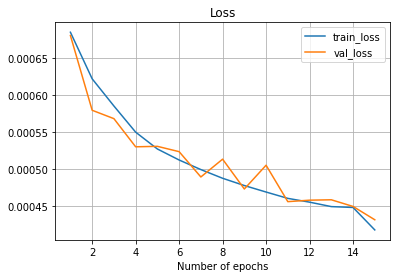

In [ ]:
plot_history(hist)

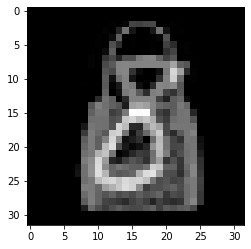

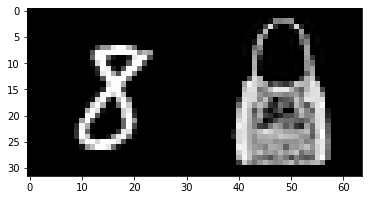

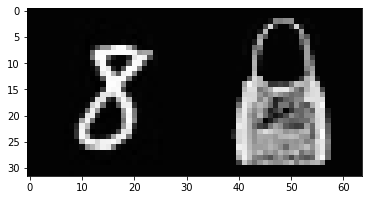

In [ ]:
x_batch, y_batch = next(test_generator)
x = x_batch[0]
y = y_batch[0]
y_pred = unet.predict(x.reshape((1,32,32)))
plt.imshow(x,cmap='gray', interpolation='nearest')
plt.show()
plt.imshow(y, cmap='gray', interpolation='nearest')
plt.show()
plt.imshow(y_pred[0].reshape((32,64)), cmap='gray', interpolation='nearest')
plt.show()

More training

In [ ]:
hist = unet.fit(train_generator, epochs=5, batch_size=batchsize, validation_data=test_generator, callbacks=[callback_checkpoint],
              steps_per_epoch=steps_per_epoch, validation_steps=val_steps)

Epoch 1/5
10000/10000 [==============================] - 358s 36ms/step - loss: 4.1199e-04 - val_loss: 4.1482e-04
Epoch 2/5
10000/10000 [==============================] - 358s 36ms/step - loss: 4.0958e-04 - val_loss: 4.1872e-04
Epoch 3/5
10000/10000 [==============================] - 359s 36ms/step - loss: 4.0823e-04 - val_loss: 4.2852e-04
Epoch 4/5
10000/10000 [==============================] - 360s 36ms/step - loss: 4.0662e-04 - val_loss: 4.1243e-04
Epoch 5/5
10000/10000 [==============================] - 360s 36ms/step - loss: 4.0614e-04 - val_loss: 4.1146e-04


In [ ]:
test_generator1 = datagenerator(mnist_x_test, fashion_mnist_x_test, 20000)
mse_list = []
for i in range(10):
  x_batch, y_batch = next(test_generator1)
  mse = unet.evaluate(x_batch, y_batch)
  mse_list.append(mse)
print(mse_list)
print('Min:', min(mse_list))
print('Mean:', np.mean(mse_list))
print('Std:', np.std(mse_list))

625/625 [==============================] - 6s 10ms/step - loss: 4.1283e-04
[0.0004083911480847746, 0.00041167845483869314, 0.000414097448810935, 0.00041372375562787056, 0.0004191736807115376, 0.0004119540099054575, 0.00040845180046744645, 0.00041397541644982994, 0.00041945945122279227, 0.0004128326545469463]
Min: 0.0004083911480847746
Mean: 0.00041337378206662834
Std: 3.548486762025747e-06


### VGG19

In [ ]:
# vgg19
hist = unet.fit(train_generator, epochs=15, batch_size=batchsize, validation_data=test_generator, callbacks=[callback_checkpoint,reduce_lr_callback],
              steps_per_epoch=steps_per_epoch, validation_steps=val_steps)

Epoch 1/15
10000/10000 [==============================] - 433s 42ms/step - loss: 0.0020 - val_loss: 0.0011 - lr: 0.0010
Epoch 2/15
 3609/10000 [=========>....................] - ETA: 4:27 - loss: 9.0750e-04

KeyboardInterrupt: ignored